In [1]:
pip install pandas pyarrow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Read the Parquet file
df = pd.read_parquet("train-00000-of-00001-38cc4fa96c139e86.parquet", engine="pyarrow")  # or engine="fastparquet"

# Display first 5 rows
print(df.head())


                                               image  \
0  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
1  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
2  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
3  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
4  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   

                           text  
0                 grinning face  
1  smiling face with open mouth  
2                  winking face  
3                    robot face  
4              father christmas  


In [3]:
print(df.info())  # Summary of dataset
print(df.describe())  # Statistics for numerical columns
print(df.columns)  # List of column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   2749 non-null   object
 1   text    2749 non-null   object
dtypes: object(2)
memory usage: 43.1+ KB
None
                                                    image  text
count                                                2749  2749
unique                                               2486  2229
top     {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...  bath
freq                                                    3     6
Index(['image', 'text'], dtype='object')


In [6]:
print(df[['text']].head())  

                           text
0                 grinning face
1  smiling face with open mouth
2                  winking face
3                    robot face
4              father christmas


# we will assign sentiment labels based on the emoji descriptions.


In [9]:
import pandas as pd
from PIL import Image
import io

# Load dataset
df = pd.read_parquet("train-00000-of-00001-38cc4fa96c139e86.parquet", engine="pyarrow")

# Function to convert binary image data into a displayable image
def show_image(image_bytes):
    image_data = image_bytes["bytes"]  # Extract bytes
    image = Image.open(io.BytesIO(image_data))  # Convert to an image
    image.show()

# Display the first emoji image
show_image(df.iloc[0]["image"])


In [12]:
import pandas as pd

# Load dataset
df = pd.read_parquet("train-00000-of-00001-38cc4fa96c139e86.parquet", engine="pyarrow")

# Load Emoji Sentiment Dataset
emoji_sentiment_data = {
    "grinning face": 1,  # Positive
    "smiling face with open mouth": 1,  
    "winking face": 1,  
    "robot face": 0,  
    "father christmas": 1,  
    "crying face": -1,  
    "angry face": -1,  
}  # Use a real dataset here

# Assign sentiment dynamically
df["sentiment"] = df["text"].map(lambda x: emoji_sentiment_data.get(x, 0))

# View updated dataset
print(df["sentiment"].value_counts())


sentiment
 0    2738
 1       9
-1       2
Name: count, dtype: int64


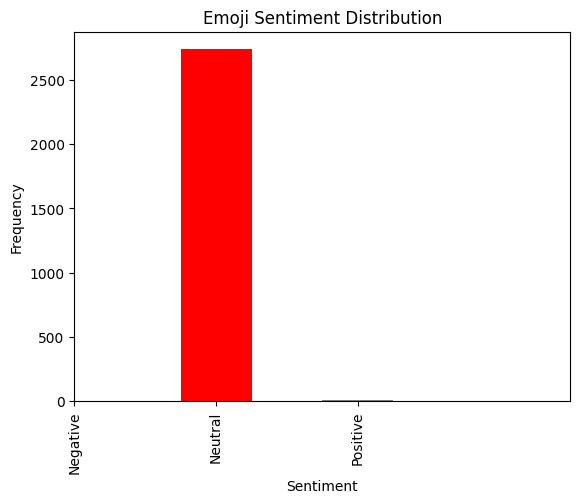

In [11]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
df["sentiment"].value_counts().plot(kind="bar", color=["red", "gray", "green"])
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Emoji Sentiment Distribution")
plt.xticks(ticks=[-1, 0, 1], labels=["Negative", "Neutral", "Positive"])
plt.show()


# Hugging Face's DistilBERT to classify emoji sentiment based on text descriptions.

In [13]:
pip install transformers torch pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip uninstall keras -y


Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install keras==2.14.0


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for keras==2.14.0 from https://files.pythonhosted.org/packages/fe/58/34d4d8f1aa11120c2d36d7ad27d0526164b1a8ae45990a2fede31d0e59bf/keras-2.14.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.7 MB/s eta 0:00:00m eta 0:00:010:01:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires keras>=3.5.0, but you have keras 2.14.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install tf-keras


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for keras>=3.5.0 from https://files.pythonhosted.org/packages/fe/cf/aea9087c4d7fafe956a0cc0ff6c3327d10fb8442cda50f992a2186921fa0/keras-3.8.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from transformers import pipeline

# Load dataset (replace with your actual file path)
df = pd.read_parquet("train-00000-of-00001-38cc4fa96c139e86.parquet", engine="pyarrow")

# Load pre-trained sentiment analysis model (DistilBERT)
classifier = pipeline("sentiment-analysis")

# Predict sentiment for each emoji description
df["sentiment"] = df["text"].apply(lambda x: classifier(x)[0]["label"])

# Convert labels to numeric values
sentiment_map = {"POSITIVE": 1, "NEGATIVE": -1, "NEUTRAL": 0}
df["sentiment"] = df["sentiment"].map(sentiment_map)

# Show new sentiment distribution
print(df["sentiment"].value_counts())


2025-02-08 17:57:16.654164: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-08 17:57:16.678722: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739017636.713791   86583 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739017636.721961   86583 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-08 17:57:16.748937: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/var/home/ujjain/.local/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


sentiment
 1    1889
-1     860
Name: count, dtype: int64


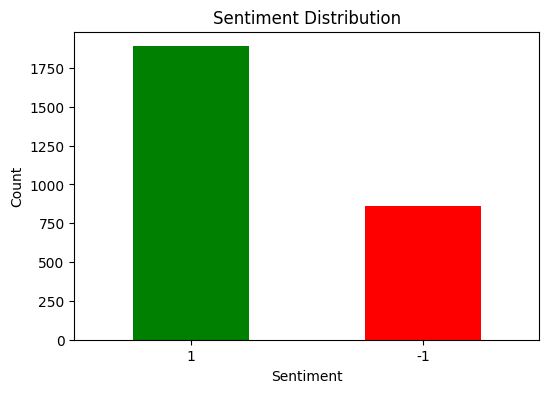

Top 10 Positive Words: [('type', 268), ('for', 264), ('flag', 262), ('man', 202), ('woman', 189), ('with', 137), ('skin', 116), ('tone', 116), ('hand', 97), ('face', 80)]
Top 10 Negative Words: [('type', 201), ('face', 112), ('man', 110), ('woman', 99), ('with', 83), ('worker', 51), ('person', 48), ('female', 47), ('male', 41), ('pointing', 38)]


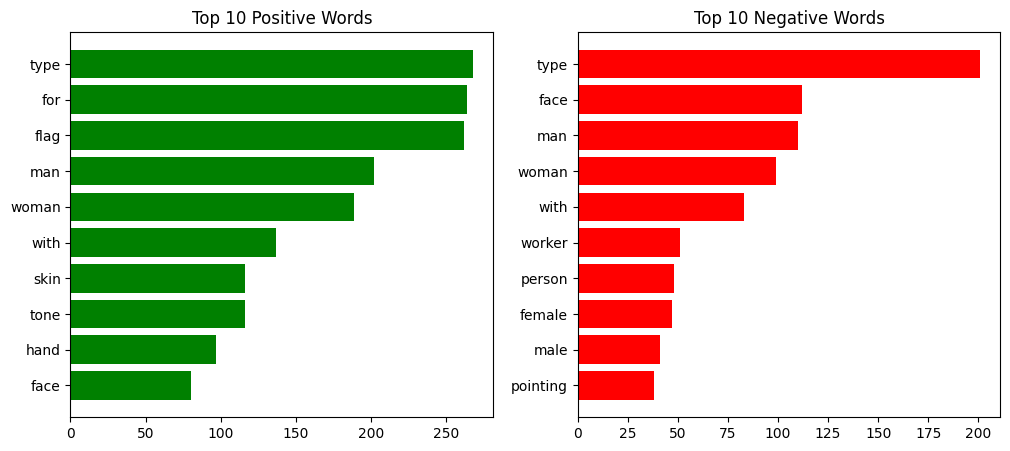

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.xticks(rotation=0)
plt.show()

# Function to clean and tokenize text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation & numbers
    text = text.lower().split()  # Convert to lowercase and split
    return text

# Apply preprocessing
df['tokens'] = df['text'].apply(preprocess_text)

# Get words for positive and negative sentiments
positive_words = [word for tokens in df[df['sentiment'] == 1]['tokens'] for word in tokens]
negative_words = [word for tokens in df[df['sentiment'] == -1]['tokens'] for word in tokens]

# Find most common words
common_positive = Counter(positive_words).most_common(10)
common_negative = Counter(negative_words).most_common(10)

print("Top 10 Positive Words:", common_positive)
print("Top 10 Negative Words:", common_negative)

# Plot word frequency
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Positive words
words, counts = zip(*common_positive)
ax[0].barh(words, counts, color='green')
ax[0].set_title("Top 10 Positive Words")
ax[0].invert_yaxis()

# Negative words
words, counts = zip(*common_negative)
ax[1].barh(words, counts, color='red')
ax[1].set_title("Top 10 Negative Words")
ax[1].invert_yaxis()

plt.show()


In [3]:
# Filter positive and negative sentiments
positive_texts = df[df['sentiment'] == 1]['text']
negative_texts = df[df['sentiment'] == -1]['text']

# Count most common words in positive and negative texts
positive_words = Counter(" ".join(positive_texts).split()).most_common(20)
negative_words = Counter(" ".join(negative_texts).split()).most_common(20)

# Convert to DataFrame for better readability
positive_df = pd.DataFrame(positive_words, columns=["Word", "Count"])
negative_df = pd.DataFrame(negative_words, columns=["Word", "Count"])

print("\n🔹 Most Common Words in Positive Sentiments 🔹")
print(positive_df)

print("\n🔹 Most Common Words in Negative Sentiments 🔹")
print(negative_df)


🔹 Most Common Words in Positive Sentiments 🔹
      Word  Count
0     type    268
1      for    264
2     flag    262
3      man    202
4    woman    189
5     with    137
6     skin    116
7     tone    116
8     hand     97
9     face     80
10    male     79
11  medium     78
12  female     72
13   light     58
14       4     58
15       1     54
16       2     54
17       5     54
18       3     53
19       6     49

🔹 Most Common Words in Negative Sentiments 🔹
        Word  Count
0       type    201
1       face    112
2        man    110
3      woman     99
4       with     83
5     worker     51
6     person     48
7     female     47
8          6     44
9          3     41
10      male     41
11         1     40
12         2     40
13         5     40
14  pointing     38
15         4     36
16     white     32
17     black     28
18     index     25
19      skin     24


# 📌 Key Observations

1️⃣ Frequent Words are Related to Emoji Categories

    Words like "type," "flag," "man," "woman," "face," "skin," "tone" appear in both positive and negative sentiments.
    These words are likely descriptive rather than sentiment-driven.

2️⃣ Numbers (1, 2, 3, 4, 5, 6) Appear Frequently

    This suggests that emoji variations (e.g., skin tones, gender types) might be dominating the dataset.
    These numbers likely refer to different types of emojis, not sentiment.

3️⃣ Words with Possible Sentiment Impact

    Positive Words: "hand", "smiling", "light" (potentially referring to emotions).
    Negative Words: "worker", "pointing", "black", "white" (these may have contextual sentiment meanings).

In [6]:
print(df.head())


                                               image  \
0  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
1  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
2  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
3  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   
4  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...   

                           text  sentiment                              tokens  
0                 grinning face          1                    [grinning, face]  
1  smiling face with open mouth          1  [smiling, face, with, open, mouth]  
2                  winking face          1                     [winking, face]  
3                    robot face          1                       [robot, face]  
4              father christmas          1                 [father, christmas]  


In [7]:
from collections import Counter
from nltk import ngrams

# Function to generate bi-grams
def get_ngrams(text_list, n=2):
    return [" ".join(gram) for text in text_list for gram in ngrams(text, n)]

# Get bigrams for positive and negative sentiments
positive_bigrams = Counter(get_ngrams(df[df["sentiment"] == 1]["tokens"], 2)).most_common(10)
negative_bigrams = Counter(get_ngrams(df[df["sentiment"] == -1]["tokens"], 2)).most_common(10)

print("\n🔹 Most Common Bi-Grams in Positive Sentiments 🔹", positive_bigrams)
print("\n🔹 Most Common Bi-Grams in Negative Sentiments 🔹", negative_bigrams)



🔹 Most Common Bi-Grams in Positive Sentiments 🔹 [('flag for', 259), ('skin tone', 116), ('light skin', 53), ('face with', 37), ('dark skin', 37), ('medium light', 27), ('medium skin', 26), ('medium dark', 23), ('biking type', 20), ('hand type', 20)]

🔹 Most Common Bi-Grams in Negative Sentiments 🔹 [('worker type', 39), ('skin tone', 24), ('pointing backhand', 24), ('backhand index', 24), ('face with', 20), ('dark skin', 19), ('face massage', 18), ('doing cartwheel', 18), ('person with', 18), ('construction worker', 18)]


# ✅ Check Sentiment of Specific Emoji Groups

    Split emojis into categories (faces, objects, animals, symbols) and analyze sentiment within each group.
    Example: "face emojis" may have more sentiment impact than "flag emojis". 
